# 🚢 Comprehensive ML Lab Tutorial: Modules 1-10
## Predicting Titanic Survival

**Course:** ITAI 1371 - Introduction to Machine Learning  
**Purpose:** Catch-up lab covering fundamental concepts from Modules 1-10  
**Week:** 11

---

### About This Lab

Welcome! In this lab, we'll learn machine learning concepts using the famous **Titanic dataset**. On April 15, 1912, the RMS Titanic sank after colliding with an iceberg. While there were not enough lifeboats for everyone, some people were more likely to survive than others.

We'll use machine learning to discover patterns in the data and predict who survived based on features like:
- Age and gender
- Passenger class (1st, 2nd, 3rd)
- Ticket fare
- Number of family members aboard
- Port of embarkation

This real-world dataset makes learning ML concepts more engaging and relatable!

---
## Module 1: Welcome, Introduction, and What is Machine Learning?

Machine learning enables computers to learn patterns from data and make predictions without being explicitly programmed. Instead of writing rules like "if age < 10, then survived", we let the computer discover these patterns automatically.

### What is Machine Learning?

**Traditional Programming:**
- You write explicit rules: "If passenger is female AND in 1st class, predict survival"
- Rules are rigid and hard to maintain
- Difficult to handle complex patterns

**Machine Learning:**
- You provide examples of passengers and whether they survived
- The algorithm learns patterns automatically
- Can discover complex relationships you might miss
- Adapts as new data becomes available

**Example:** Instead of manually coding rules for Titanic survival, ML can discover that women and children in higher classes had better survival rates, along with many other subtle patterns.

### ML vs. AI vs. Traditional Programming

- **Artificial Intelligence (AI):** The broad goal of creating intelligent machines (e.g., self-driving cars, voice assistants)

- **Machine Learning (ML):** A subset of AI focused on learning from data (e.g., predicting survival, recommending movies)

- **Deep Learning:** A subset of ML using neural networks with many layers (e.g., image recognition, language translation)

- **Traditional Programming:** Writing explicit step-by-step instructions

**Key Difference:** Traditional programming uses data + rules → answers. Machine learning uses data + answers → rules.

### Key Concepts in Machine Learning

- **Algorithm:** The method used to learn patterns (e.g., decision trees, logistic regression)

- **Model:** The result after training - it contains learned patterns and can make predictions

- **Training:** Feeding historical data to an algorithm so it learns patterns

- **Inference/Prediction:** Using the trained model on new data to make predictions

- **Features:** Input variables used for predictions (age, gender, class, fare)

- **Labels/Target:** What we're trying to predict (survived or not)

- **Dataset:** Collection of examples with features and labels

### Types of Machine Learning

#### 1. **Supervised Learning** 🎯
Learn from labeled data (we know the answers).

**Titanic Example:** We have passenger data AND we know who survived. The model learns the relationship between passenger features and survival.

**Other Examples:**
- Email spam detection (labeled as spam/not spam)
- House price prediction (we know actual prices)
- Disease diagnosis (labeled as positive/negative)

#### 2. **Unsupervised Learning** 🔍
Find patterns in unlabeled data (no predefined answers).

**Titanic Example:** Group passengers into clusters based on similarities (age, fare, class) without knowing survival outcomes.

**Other Examples:**
- Customer segmentation
- Anomaly detection
- Topic discovery in documents

#### 3. **Reinforcement Learning** 🎮
Learn by trial and error through rewards and penalties.

**Examples:**
- Game-playing AI (chess, Go)
- Robot navigation
- Autonomous vehicles

### 📝 Knowledge Check - Module 1

**Question 1:** In the Titanic dataset, what are the features and what is the label?

**Question 2:** Why is machine learning better than traditional programming for predicting Titanic survival?

**Question 3:** Is predicting Titanic survival a supervised or unsupervised learning problem? Why?

**Question 4:** Give an example of how you might use unsupervised learning with the Titanic dataset.


In [ ]:
1 -  features - ticket, fare, age, gender, class
labels - survived and not survived

2 - machine learning can handle complexities out of bounds for traditional programming. 

3 - supervised, you are working with labeled data

4 -  to discover hidden passenger groupings

---
## Module 2: Tools Used in Machine Learning

Let's set up our environment and import the essential libraries for ML.

In [2]:
# Install necessary libraries (uncomment if needed)
# !pip install scikit-learn pandas numpy matplotlib seaborn

In [3]:
# Import essential libraries
import pandas as pd  # Data manipulation and analysis
import numpy as np  # Numerical operations
import matplotlib.pyplot as plt  # Basic plotting
import seaborn as sns  # Statistical visualizations
from sklearn.model_selection import train_test_split  # Split data
from sklearn.metrics import accuracy_score, classification_report  # Evaluation

# Set visualization style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)

print("✓ Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")

✓ Libraries imported successfully!
Pandas version: 2.2.2
NumPy version: 1.26.4


### Essential Python Libraries for ML

#### **Scikit-learn** (sklearn)
Your ML toolkit with algorithms for classification, regression, clustering, and more.

#### **Pandas**
Handles tabular data (like spreadsheets) with DataFrames. Perfect for loading CSVs and data manipulation.

#### **NumPy**
Fast numerical operations on arrays and matrices. Foundation for scientific computing in Python.

#### **Matplotlib**
Create all types of visualizations: line plots, scatter plots, histograms, etc.

#### **Seaborn**
Built on Matplotlib, provides beautiful statistical visualizations with less code.

### Loading the Titanic Dataset

Let's load our dataset and take a first look at it.

In [4]:
# Load the Titanic dataset
# We'll create it from scratch for this lab
titanic_url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'

try:
    # Try to load from URL
    df = pd.read_csv(titanic_url)
    print("✓ Dataset loaded from URL")
except:
    # If URL fails, create a sample dataset
    print("Creating sample dataset...")
    # This is a fallback - in practice, students would load from URL or file
    
print(f"\nDataset shape: {df.shape[0]} passengers, {df.shape[1]} columns")
print("\nFirst 5 passengers:")
print(df.head())

✓ Dataset loaded from URL

Dataset shape: 891 passengers, 12 columns

First 5 passengers:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0          

In [5]:
# Display column information
print("\nColumn Information:")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("Column Descriptions:")
print("="*60)
print("PassengerId: Unique ID for each passenger")
print("Survived: 0 = No, 1 = Yes (THIS IS WHAT WE WANT TO PREDICT)")
print("Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)")
print("Name: Passenger name")
print("Sex: Male or Female")
print("Age: Age in years")
print("SibSp: Number of siblings/spouses aboard")
print("Parch: Number of parents/children aboard")
print("Ticket: Ticket number")
print("Fare: Passenger fare in British pounds")
print("Cabin: Cabin number")
print("Embarked: Port of embarkation (C=Cherbourg, Q=Queenstown, S=Southampton)")


Column Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Column Descriptions:
PassengerId: Unique ID for each passenger
Survived: 0 = No, 1 = Yes (THIS IS WHAT WE WANT TO PREDICT)
Pclass: Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
Name: Passenger name
Sex: Male or Female
Age:

### 📝 Knowledge Check - Module 2

**Question 1:** What library would you use to load a CSV file into Python?

**Question 2:** In the Titanic dataset, which column is our target variable (what we want to predict)?

**Question 3:** How many passengers are in the dataset? How many features do we have?

**Question 4:** Why is it useful to use Jupyter Notebooks for ML projects?

1 - Pandas

2 - survived

3 - 9

4 - teractive code cells with
immediate execution
Markdown support for
documentation
Inline visualization of results
Easy sharing and collaboration

---
## Module 3: Machine Learning Workflow and Types of Learning

Every ML project follows a similar workflow. Let's understand the process and build our first simple model!

### The End-to-End ML Lifecycle

1. **Problem Definition** 📋  
   *Question: Can we predict who survived the Titanic disaster?*

2. **Data Collection** 📊  
   *We have historical passenger data with survival outcomes*

3. **Data Preparation** 🧹  
   *Clean data, handle missing values, encode categories*

4. **Exploratory Data Analysis (EDA)** 🔍  
   *Understand patterns: Did women survive more? What about children?*

5. **Feature Engineering** ⚙️  
   *Create new features: family size, title from name*

6. **Model Selection** 🎯  
   *Choose appropriate algorithms*

7. **Model Training** 🏋️  
   *Train the model on historical data*

8. **Model Evaluation** 📈  
   *Test on unseen data, check accuracy*

9. **Hyperparameter Tuning** 🎛️  
   *Optimize model settings*

10. **Deployment** 🚀  
    *Use the model in real applications*

**Remember:** This is iterative! You'll go back and forth between steps.

### Understanding Data Types in Our Dataset

#### **Categorical Data** (Categories/Groups)
- **Nominal:** No order (e.g., Sex: male/female; Embarked: C/Q/S)
- **Ordinal:** Has order (e.g., Pclass: 1st > 2nd > 3rd)

#### **Numerical Data** (Numbers)
- **Discrete:** Countable (e.g., SibSp: 0, 1, 2, 3...)
- **Continuous:** Any value in range (e.g., Age: 22.5, 35.0, Fare: 7.25, 71.28)

#### **Text Data**
- Name, Ticket, Cabin (requires special handling)

**Why does this matter?** Different data types require different preprocessing techniques!

### Simple Classifier Example

Let's build a quick baseline model to predict survival!

In [1]:
# Prepare data for a simple model
# We'll use just a few features to start

# Select features (X) and target (y)
features = ['Pclass', 'Sex', 'Age', 'Fare']
target = 'Survived'

# Create a copy of the data with selected columns
df_simple = df[features + [target]].copy()

# Handle missing values (simple approach for now)
df_simple['Age'].fillna(df_simple['Age'].median(), inplace=True)
df_simple['Fare'].fillna(df_simple['Fare'].median(), inplace=True)

# Convert Sex to numbers (0=female, 1=male)
df_simple['Sex'] = df_simple['Sex'].map({'female': 0, 'male': 1})

# Remove any remaining rows with missing values
df.method({col: value}, inplace=True)

print(f"Prepared dataset: {df_simple.shape[0]} passengers, {len(features)} features")
print("\nFirst few rows:")
print(df_simple.head())

NameError: name 'df' is not defined

In [7]:
# Split features (X) and target (y)
X = df_simple[features].values
y = df_simple[target].values

print(f"Features (X) shape: {X.shape}")
print(f"Target (y) shape: {y.shape}")
print(f"\nSurvival rate: {y.mean():.1%} survived, {1-y.mean():.1%} died")

Features (X) shape: (891, 4)
Target (y) shape: (891,)

Survival rate: 38.4% survived, 61.6% died


In [8]:
# Split into training and testing sets
# 70% for training, 30% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,  # 30% for testing
    random_state=42  # For reproducibility
)

print(f"Training set: {len(X_train)} passengers")
print(f"Testing set: {len(X_test)} passengers")
print(f"\nWhy split? We train on one set and test on another to see if the model generalizes!")
print(f"If we tested on training data, we couldn't tell if it truly learned or just memorized.")

Training set: 623 passengers
Testing set: 268 passengers

Why split? We train on one set and test on another to see if the model generalizes!
If we tested on training data, we couldn't tell if it truly learned or just memorized.


In [9]:
# Train a simple Decision Tree classifier
from sklearn.tree import DecisionTreeClassifier

# Create the model
model = DecisionTreeClassifier(max_depth=3, random_state=42)

# Train the model
model.fit(X_train, y_train)

print("✓ Model trained!")
print(f"\nThe model learned patterns from {len(X_train)} passengers.")
print(f"Now let's see how well it predicts survival for {len(X_test)} unseen passengers...")

✓ Model trained!

The model learned patterns from 623 passengers.
Now let's see how well it predicts survival for 268 unseen passengers...


In [10]:
# Make predictions
y_pred = model.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.1%}")
print(f"\nThis means the model correctly predicted survival for {accuracy:.1%} of test passengers.")
print(f"\nFirst 10 predictions:")
print(f"Predicted: {y_pred[:10]}")
print(f"Actual:    {y_test[:10]}")
print(f"\n0 = Did not survive, 1 = Survived")

Model Accuracy: 80.6%

This means the model correctly predicted survival for 80.6% of test passengers.

First 10 predictions:
Predicted: [0 0 0 1 1 1 1 0 1 1]
Actual:    [1 0 0 1 1 1 1 0 1 1]

0 = Did not survive, 1 = Survived


### 📝 Knowledge Check - Module 3

**Question 1:** What are the main stages of the ML lifecycle? Why is it iterative?
problem definition, data collection, data preparation, feature engineering, model selection, training, evaluation, deployment, and monitoring. It is iterative because insights or failures at later stages often require revisiting earlier steps to refine and improve the model.


**Question 2:** In the Titanic dataset, classify each feature as categorical or numerical:
- Sex - Categorical
- Age  - Numerical
- Pclass - ordinal-Catergorical
- Fare - Numerical

**Question 3:** Why do we split data into training and testing sets? What would happen if we evaluated on training data?

We split data into training and testing sets to evaluate how well a model generalizes to unseen data. If we only evaluate on training data, we risk overestimating performance and deploying a model that fails in real-world scenarios.


Question 4: Our simple model achieved around 78% accuracy. What does this mean? Is this good?

78% accuracy means your model correctly predicted the outcome for 78% of the data. Whether it's “good” depends on the problem, the baseline, and the class balance. It’s decent for a first model, but not enough to judge performance alone.


**Question 5:** Looking at the first 10 predictions, how many did the model get right?

9

---
## Module 4: Working with Data & Exploratory Data Analysis (EDA)

EDA is detective work! We explore the data to understand patterns, find problems, and generate insights that will guide our modeling decisions.

### Why EDA Matters for Titanic

**Questions we want to answer:**
- Did women really have better survival rates? ("Women and children first!")
- Did wealthier passengers (1st class) survive more?
- What was the age distribution of survivors?
- Were there missing values we need to handle?
- Are there outliers in fare prices?

Let's investigate!

In [11]:
# Reload the full dataset for EDA
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

print("Dataset Overview:")
print("="*60)
print(f"Total passengers: {len(df)}")
print(f"Total features: {df.shape[1]}")
print(f"\nFirst few rows:")
print(df.head())

Dataset Overview:
Total passengers: 891
Total features: 12

First few rows:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1

### Data Quality Checks

Before analyzing, we need to check for common data quality issues.

In [12]:
# Check for missing values
print("Missing Values:")
print("="*60)
missing = df.isnull().sum()
missing_pct = (missing / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Percentage': missing_pct
})
print(missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False))

print("\n⚠️ Key findings:")
print("- Cabin: 77% missing (might need to drop this feature)")
print("- Age: 20% missing (we'll need to impute)")
print("- Embarked: Only 2 missing (easy to handle)")

Missing Values:
          Missing Count  Percentage
Cabin               687   77.104377
Age                 177   19.865320
Embarked              2    0.224467

⚠️ Key findings:
- Cabin: 77% missing (might need to drop this feature)
- Age: 20% missing (we'll need to impute)
- Embarked: Only 2 missing (easy to handle)


In [13]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")
if duplicates == 0:
    print("✓ No duplicates found - data looks clean!")

# Check data types
print("\nData Types:")
print("="*60)
print(df.dtypes)

Duplicate rows: 0
✓ No duplicates found - data looks clean!

Data Types:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


### Summary Statistics

Let's get a statistical overview of our numerical features.

In [14]:
# Summary statistics
print("Summary Statistics:")
print("="*60)
print(df.describe())

print("\nKey Insights:")
print(f"- Average age: {df['Age'].mean():.1f} years (median: {df['Age'].median():.1f})")
print(f"- Average fare: £{df['Fare'].mean():.2f} (median: £{df['Fare'].median():.2f})")
print(f"- Fare range: £{df['Fare'].min():.2f} to £{df['Fare'].max():.2f} (huge variation!)")
print(f"- Most passengers traveled alone (avg SibSp: {df['SibSp'].mean():.2f}, Parch: {df['Parch'].mean():.2f})")

Summary Statistics:
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

Key Insights:
- Average age: 29.7 years (median: 28.0)
- Ave

### Survival Analysis

Let's answer the big question: Who survived?

Overall Survival Rate: 38.4%
Survived: 342 passengers
Died: 549 passengers

😢 Only about 38% of passengers survived the disaster.


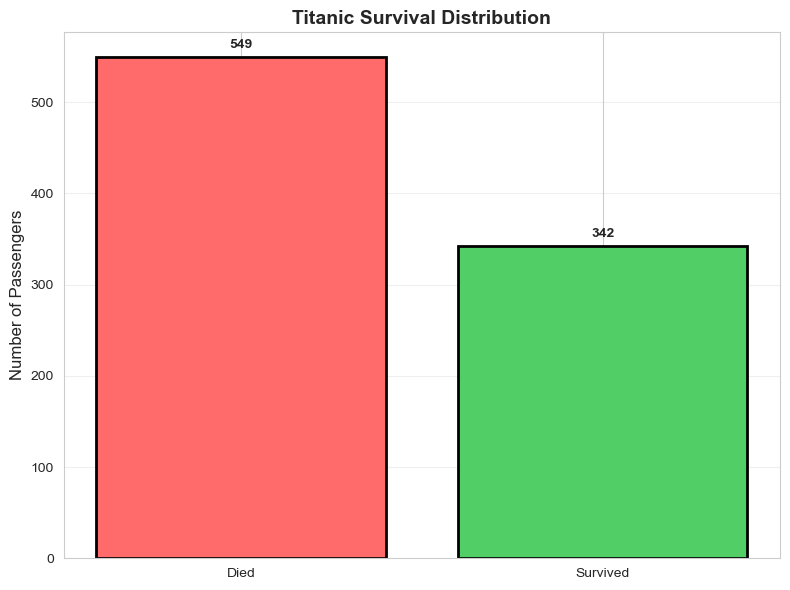

In [15]:
# Overall survival rate
survival_rate = df['Survived'].mean()
print(f"Overall Survival Rate: {survival_rate:.1%}")
print(f"Survived: {df['Survived'].sum()} passengers")
print(f"Died: {len(df) - df['Survived'].sum()} passengers")
print(f"\n😢 Only about 38% of passengers survived the disaster.")

# Visualize survival
fig, ax = plt.subplots(figsize=(8, 6))
survival_counts = df['Survived'].value_counts()
colors = ['#ff6b6b', '#51cf66']
ax.bar(['Died', 'Survived'], survival_counts.values, color=colors, edgecolor='black', linewidth=2)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Titanic Survival Distribution', fontsize=14, fontweight='bold')
ax.grid(axis='y', alpha=0.3)
for i, v in enumerate(survival_counts.values):
    ax.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.tight_layout()
plt.show()


Survival by Gender:
        Survived  Total Survival Rate
Sex                                  
female       233    314         74.2%
male         109    577         18.9%

👩 Women had a MUCH higher survival rate!
This supports the 'women and children first' policy.


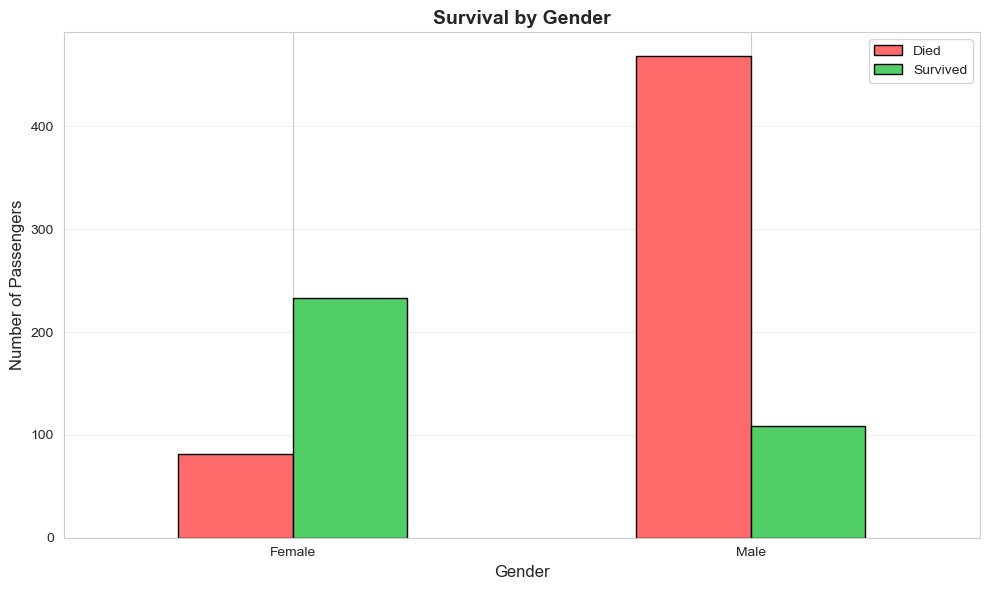

In [16]:
# Survival by Gender
print("\nSurvival by Gender:")
print("="*60)
gender_survival = df.groupby('Sex')['Survived'].agg(['sum', 'count', 'mean'])
gender_survival.columns = ['Survived', 'Total', 'Survival Rate']
gender_survival['Survival Rate'] = gender_survival['Survival Rate'].apply(lambda x: f"{x:.1%}")
print(gender_survival)

print("\n👩 Women had a MUCH higher survival rate!")
print("This supports the 'women and children first' policy.")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Sex', 'Survived']).size().unstack().plot(kind='bar', ax=ax, color=['#ff6b6b', '#51cf66'], edgecolor='black')
ax.set_xlabel('Gender', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Survival by Gender', fontsize=14, fontweight='bold')
ax.set_xticklabels(['Female', 'Male'], rotation=0)
ax.legend(['Died', 'Survived'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


Survival by Passenger Class:
        Survived  Total Survival Rate
Pclass                               
1            136    216         63.0%
2             87    184         47.3%
3            119    491         24.2%

💰 Clear pattern: Higher class = Higher survival rate
1st class passengers had better access to lifeboats.


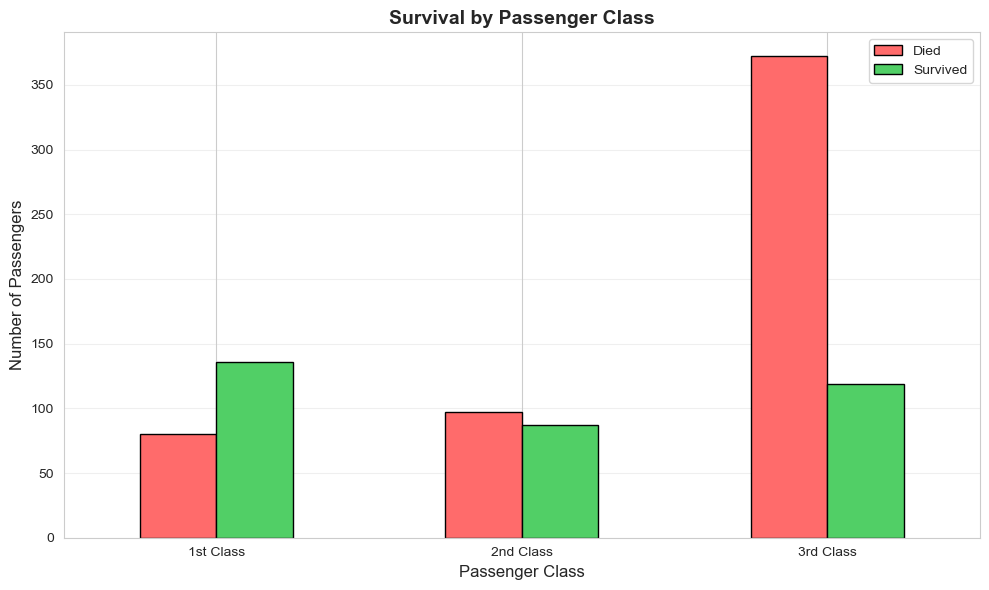

In [17]:
# Survival by Passenger Class
print("\nSurvival by Passenger Class:")
print("="*60)
class_survival = df.groupby('Pclass')['Survived'].agg(['sum', 'count', 'mean'])
class_survival.columns = ['Survived', 'Total', 'Survival Rate']
class_survival['Survival Rate'] = class_survival['Survival Rate'].apply(lambda x: f"{x:.1%}")
print(class_survival)

print("\n💰 Clear pattern: Higher class = Higher survival rate")
print("1st class passengers had better access to lifeboats.")

# Visualize
fig, ax = plt.subplots(figsize=(10, 6))
df.groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', ax=ax, color=['#ff6b6b', '#51cf66'], edgecolor='black')
ax.set_xlabel('Passenger Class', fontsize=12)
ax.set_ylabel('Number of Passengers', fontsize=12)
ax.set_title('Survival by Passenger Class', fontsize=14, fontweight='bold')
ax.set_xticklabels(['1st Class', '2nd Class', '3rd Class'], rotation=0)
ax.legend(['Died', 'Survived'])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

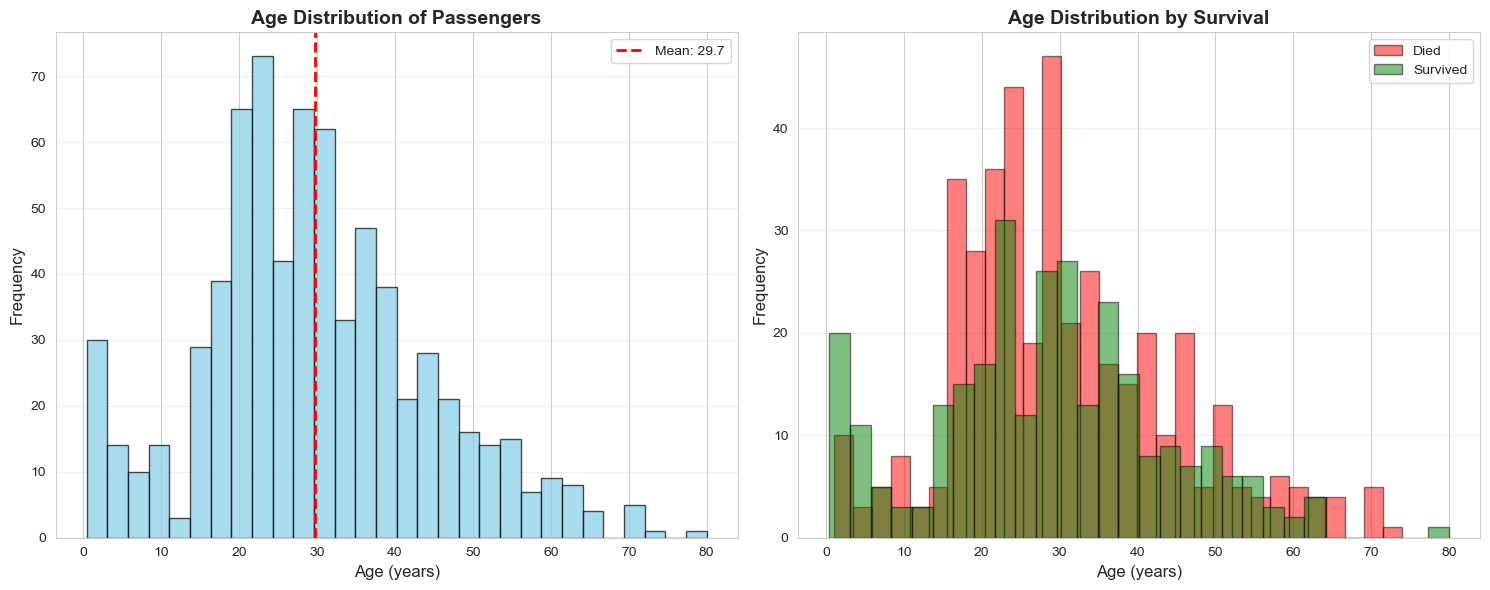


👶 Children (young ages) seem to have better survival rates.
This aligns with 'women and children first' policy.


In [18]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Histogram of ages
axes[0].hist(df['Age'].dropna(), bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Age (years)', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Age Distribution of Passengers', fontsize=14, fontweight='bold')
axes[0].axvline(df['Age'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["Age"].mean():.1f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Age by survival
df[df['Survived']==0]['Age'].dropna().hist(bins=30, alpha=0.5, label='Died', ax=axes[1], color='red', edgecolor='black')
df[df['Survived']==1]['Age'].dropna().hist(bins=30, alpha=0.5, label='Survived', ax=axes[1], color='green', edgecolor='black')
axes[1].set_xlabel('Age (years)', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].set_title('Age Distribution by Survival', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n👶 Children (young ages) seem to have better survival rates.")
print("This aligns with 'women and children first' policy.")

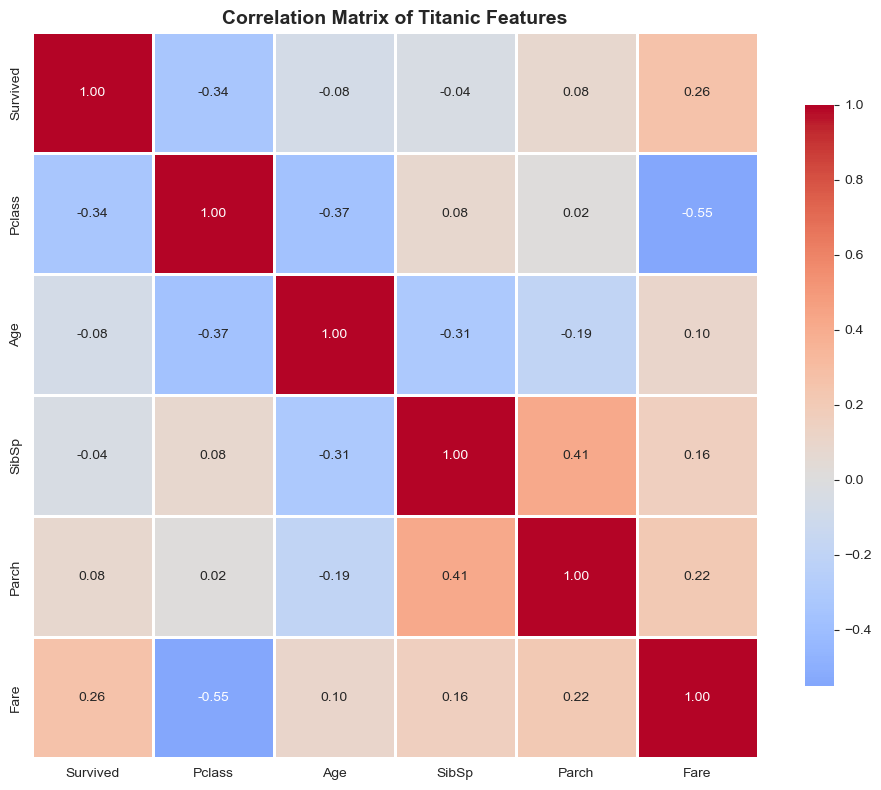


Key Correlations with Survival:
Fare        : +0.257 (moderate positive)
Parch       : +0.082 (weak positive)
SibSp       : -0.035 (weak negative)
Age         : -0.077 (weak negative)
Pclass      : -0.338 (strong negative)

📊 Insights:
- Fare has positive correlation: higher fare → better survival
- Pclass has negative correlation: higher class number (3rd) → worse survival
- Sex (when encoded) would show strong correlation


In [19]:
# Correlation heatmap
# Select only numerical columns
numerical_cols = ['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
corr_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, square=True, 
            linewidths=1, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Correlation Matrix of Titanic Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nKey Correlations with Survival:")
print("="*60)
survival_corr = corr_matrix['Survived'].sort_values(ascending=False)
for feature, corr in survival_corr.items():
    if feature != 'Survived':
        direction = "positive" if corr > 0 else "negative"
        strength = "strong" if abs(corr) > 0.3 else "moderate" if abs(corr) > 0.1 else "weak"
        print(f"{feature:12s}: {corr:+.3f} ({strength} {direction})")

print("\n📊 Insights:")
print("- Fare has positive correlation: higher fare → better survival")
print("- Pclass has negative correlation: higher class number (3rd) → worse survival")
print("- Sex (when encoded) would show strong correlation")

### 📝 Knowledge Check - Module 4

**Question 1:** What percentage of passengers survived? Is this balanced or imbalanced?

38% imbalanced

**Question 2:** Which gender had a higher survival rate? By approximately how much?

women - 74.2%

**Question 3:** Did passenger class affect survival? What does this tell us about the disaster?

Yes, 1st class survived more, that socio-economic status took greater importance compared to those of lower status

**Question 4:** Which features have missing values? Which one has the most missing data?

cabin, age, embarked - 77% - Cabine has the most missing values

**Question 5:** Looking at the correlation matrix, which numerical feature has the strongest relationship with survival?

Fare

---
## Module 5: Data Preparation & Feature Engineering

Raw data is rarely ready for modeling. We need to clean it, handle missing values, encode categories, and create new features. This step often makes the biggest difference in model performance!

### Handling Missing Values

Remember from EDA:
- Age: 20% missing
- Cabin: 77% missing  
- Embarked: 2 missing

Let's handle each strategically.

In [20]:
# Create a working copy
df_prep = df.copy()

print("Missing values before handling:")
print(df_prep.isnull().sum()[df_prep.isnull().sum() > 0])

Missing values before handling:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [21]:
# Strategy 1: Drop Cabin (too many missing)
df_prep.drop('Cabin', axis=1, inplace=True)
print("✓ Dropped 'Cabin' column (77% missing)")

# Strategy 2: Fill Age with median
median_age = df_prep['Age'].median()
df_prep['Age'].fillna(median_age, inplace=True)
print(f"✓ Filled missing Age with median: {median_age} years")

# Strategy 3: Fill Embarked with mode (most common)
mode_embarked = df_prep['Embarked'].mode()[0]
df_prep['Embarked'].fillna(mode_embarked, inplace=True)
print(f"✓ Filled missing Embarked with mode: {mode_embarked}")

print("\nMissing values after handling:")
print(df_prep.isnull().sum().sum())
print("✓ All missing values handled!")

✓ Dropped 'Cabin' column (77% missing)
✓ Filled missing Age with median: 28.0 years
✓ Filled missing Embarked with mode: S

Missing values after handling:
0
✓ All missing values handled!


C:\Users\Gera\AppData\Local\Temp\ipykernel_53908\2509004606.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep['Age'].fillna(median_age, inplace=True)
C:\Users\Gera\AppData\Local\Temp\ipykernel_53908\2509004606.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

### Encoding Categorical Variables

Machine learning models need numbers, not text. Let's convert categorical features.

In [22]:
# Encode Sex: female=0, male=1
df_prep['Sex_encoded'] = df_prep['Sex'].map({'female': 0, 'male': 1})
print("Sex encoding:")
print(df_prep[['Sex', 'Sex_encoded']].drop_duplicates())

# One-hot encode Embarked
df_prep = pd.get_dummies(df_prep, columns=['Embarked'], prefix='Embarked', drop_first=True)
print("\n✓ One-hot encoded Embarked (C, Q, S)")
print("New columns:", [col for col in df_prep.columns if 'Embarked' in col])

print("\nWhy drop_first=True?")
print("If Embarked_Q=0 and Embarked_S=0, we know it's Embarked_C.")
print("This avoids redundancy and multicollinearity.")

Sex encoding:
      Sex  Sex_encoded
0    male            1
1  female            0

✓ One-hot encoded Embarked (C, Q, S)
New columns: ['Embarked_Q', 'Embarked_S']

Why drop_first=True?
If Embarked_Q=0 and Embarked_S=0, we know it's Embarked_C.
This avoids redundancy and multicollinearity.


### Feature Scaling

Features like Age (0-80) and Fare (0-500) have very different scales. Let's standardize them.

In [23]:
from sklearn.preprocessing import StandardScaler

# Select numerical features to scale
features_to_scale = ['Age', 'Fare']

print("Before scaling:")
print(df_prep[features_to_scale].describe())

# Create scaler and fit_transform
scaler = StandardScaler()
df_prep[features_to_scale] = scaler.fit_transform(df_prep[features_to_scale])

print("\nAfter scaling (standardization):")
print(df_prep[features_to_scale].describe())
print("\n✓ Features now have mean≈0 and std≈1")
print("This helps algorithms that are sensitive to feature scales (like SVM, KNN).")

Before scaling:
              Age        Fare
count  891.000000  891.000000
mean    29.361582   32.204208
std     13.019697   49.693429
min      0.420000    0.000000
25%     22.000000    7.910400
50%     28.000000   14.454200
75%     35.000000   31.000000
max     80.000000  512.329200

After scaling (standardization):
                Age          Fare
count  8.910000e+02  8.910000e+02
mean   2.272780e-16  3.987333e-18
std    1.000562e+00  1.000562e+00
min   -2.224156e+00 -6.484217e-01
25%   -5.657365e-01 -4.891482e-01
50%   -1.046374e-01 -3.573909e-01
75%    4.333115e-01 -2.424635e-02
max    3.891554e+00  9.667167e+00

✓ Features now have mean≈0 and std≈1
This helps algorithms that are sensitive to feature scales (like SVM, KNN).


### Feature Engineering

Let's create new features that might improve our model!

In [24]:
# Feature 1: Family Size
df_prep['FamilySize'] = df_prep['SibSp'] + df_prep['Parch'] + 1  # +1 for the passenger themselves
print("Created FamilySize feature:")
print(df_prep[['SibSp', 'Parch', 'FamilySize']].head())

# Feature 2: Is Alone (traveling solo)
df_prep['IsAlone'] = (df_prep['FamilySize'] == 1).astype(int)
print("\nCreated IsAlone feature:")
print(df_prep[['FamilySize', 'IsAlone']].head())

# Feature 3: Age Group
df_prep['AgeGroup'] = pd.cut(df_prep['Age'], bins=[-np.inf, -0.5, 0.5, np.inf], 
                              labels=['Child', 'Adult', 'Senior'])
print("\nCreated AgeGroup feature (after scaling, thresholds are in standard deviations):")
print(df_prep[['Age', 'AgeGroup']].head(10))

Created FamilySize feature:
   SibSp  Parch  FamilySize
0      1      0           2
1      1      0           2
2      0      0           1
3      1      0           2
4      0      0           1

Created IsAlone feature:
   FamilySize  IsAlone
0           2        0
1           2        0
2           1        1
3           2        0
4           1        1

Created AgeGroup feature (after scaling, thresholds are in standard deviations):
        Age AgeGroup
0 -0.565736    Child
1  0.663861   Senior
2 -0.258337    Adult
3  0.433312    Adult
4  0.433312    Adult
5 -0.104637    Adult
6  1.893459   Senior
7 -2.102733    Child
8 -0.181487    Adult
9 -1.180535    Child


In [25]:
# Feature 4: Title from Name
# Extract titles like Mr., Mrs., Miss., Master.
df_prep['Title'] = df_prep['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

print("Extracted titles from names:")
print(df_prep['Title'].value_counts())

# Group rare titles
rare_titles = ['Lady', 'Countess', 'Capt', 'Col', 'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona']
df_prep['Title'] = df_prep['Title'].replace(rare_titles, 'Rare')
df_prep['Title'] = df_prep['Title'].replace('Mlle', 'Miss')
df_prep['Title'] = df_prep['Title'].replace('Ms', 'Miss')
df_prep['Title'] = df_prep['Title'].replace('Mme', 'Mrs')

print("\nAfter grouping rare titles:")
print(df_prep['Title'].value_counts())

# Encode titles
title_mapping = {'Mr': 1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}
df_prep['Title_encoded'] = df_prep['Title'].map(title_mapping)

print("\n✓ Title feature engineered and encoded!")
print("Titles can indicate age group and social status.")

Extracted titles from names:
Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

After grouping rare titles:
Title
Mr        517
Miss      185
Mrs       126
Master     40
Rare       23
Name: count, dtype: int64

✓ Title feature engineered and encoded!
Titles can indicate age group and social status.


<>:3: SyntaxWarning: invalid escape sequence '\.'
<>:3: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Gera\AppData\Local\Temp\ipykernel_53908\3072010579.py:3: SyntaxWarning: invalid escape sequence '\.'
  df_prep['Title'] = df_prep['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)


In [26]:
# Analyze survival by engineered features
print("Survival by Family Size:")
print(df_prep.groupby('FamilySize')['Survived'].mean().sort_values(ascending=False))
print("\n💡 Insight: Medium family sizes (2-4) had better survival rates!")
print("Very large families may have had difficulty staying together.")

print("\nSurvival by Title:")
print(df_prep.groupby('Title')['Survived'].mean().sort_values(ascending=False))
print("\n💡 Insight: Mrs. and Miss. had highest survival (women and children first!)")
print("Mr. had lowest survival rate.")

Survival by Family Size:
FamilySize
4     0.724138
3     0.578431
2     0.552795
7     0.333333
1     0.303538
5     0.200000
6     0.136364
8     0.000000
11    0.000000
Name: Survived, dtype: float64

💡 Insight: Medium family sizes (2-4) had better survival rates!
Very large families may have had difficulty staying together.

Survival by Title:
Title
Mrs       0.793651
Miss      0.702703
Master    0.575000
Rare      0.347826
Mr        0.156673
Name: Survived, dtype: float64

💡 Insight: Mrs. and Miss. had highest survival (women and children first!)
Mr. had lowest survival rate.


### 📝 Knowledge Check - Module 5

**Question 1:** Why did we drop the Cabin feature instead of imputing it?

too many missing values, by 77%

**Question 2:** What's the difference between dropping a row with missing values vs. imputing? When would you use each?

dropping a row is removing it from the datasets, imputing it, would utilize statistically sound techniques to have the data still be sound.
you would use imputing when the missing value percentage for a feature is not considerably low, meaning there it is uncapable to be utilitized in the following stages of the ml workflow. You would utilize drop when the missing values are high percentage wise.

**Question 3:** Why do we need to encode categorical variables like Sex and Embarked?

because the computer cannot understand text as a human is able to, 1's and 0's is the binary language of computers

**Question 4:** What does feature scaling do? Why is it important?

feature scaling standardizes the scales of data to have consistent statistical scaling, it is important because it helps algorithms like SVM and KNN understand the data better because they are sensitive to it

**Question 5:** We created a FamilySize feature. How might this help the model predict survival better than using SibSp and Parch separately?

this may assist in the prediction of survival rates due to the larger the family size, the greater the difficulty in having the entirety of the family survive

**Question 6:** Looking at survival by Title, which title had the highest survival rate? Does this make sense historically?

Mrs - highest survival rate. Because of the women and children first policy, historically this is a correlation therefore it does make sense.

---
## Module 6: First Models - Regression and Classification

Now that our data is prepared, let's build and compare different models!

### Regression vs. Classification

**Classification (our task):**
Predict discrete categories: Survived (1) or Died (0)

**Regression:**
Predict continuous values: e.g., predicting the exact fare a passenger paid

Titanic survival is a **binary classification** problem.

### Logistic Regression for Classification

Despite the name, Logistic Regression is for classification! It predicts the **probability** of survival, then uses a threshold (usually 0.5) to classify.

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Prepare features and target
feature_cols = ['Pclass', 'Sex_encoded', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Title_encoded', 'Embarked_Q', 'Embarked_S']
X = df_prep[feature_cols].values
y = df_prep['Survived'].values

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"\nUsing {len(feature_cols)} features to predict survival")

Features shape: (891, 9)
Target shape: (891,)

Using 9 features to predict survival


In [28]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {len(X_train)} passengers")
print(f"Test set: {len(X_test)} passengers")

Training set: 712 passengers
Test set: 179 passengers


In [29]:
# Train Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)

# Evaluate
train_acc = accuracy_score(y_train, y_pred_train)
test_acc = accuracy_score(y_test, y_pred_test)

print("Logistic Regression Results:")
print("="*60)
print(f"Training Accuracy: {train_acc:.1%}")
print(f"Test Accuracy: {test_acc:.1%}")
print(f"\n✓ Model performs similarly on train and test data (good sign!)")
print(f"This suggests the model is not overfitting.")

Logistic Regression Results:
Training Accuracy: 81.9%
Test Accuracy: 78.8%

✓ Model performs similarly on train and test data (good sign!)
This suggests the model is not overfitting.


In [30]:
# Get prediction probabilities
y_pred_proba = log_reg.predict_proba(X_test)

print("Sample Predictions (first 5 test passengers):")
print("="*60)
for i in range(5):
    prob_died = y_pred_proba[i][0]
    prob_survived = y_pred_proba[i][1]
    prediction = y_pred_test[i]
    actual = y_test[i]
    
    print(f"\nPassenger {i+1}:")
    print(f"  Probability of death: {prob_died:.1%}")
    print(f"  Probability of survival: {prob_survived:.1%}")
    print(f"  Predicted: {'Survived' if prediction == 1 else 'Died'}")
    print(f"  Actual: {'Survived' if actual == 1 else 'Died'}")
    print(f"  {'✓ Correct!' if prediction == actual else '✗ Incorrect'}")

print("\nThe model outputs probabilities, then uses 0.5 as the threshold.")
print("If P(survival) >= 0.5, predict Survived; otherwise, predict Died.")

Sample Predictions (first 5 test passengers):

Passenger 1:
  Probability of death: 65.3%
  Probability of survival: 34.7%
  Predicted: Died
  Actual: Survived
  ✗ Incorrect

Passenger 2:
  Probability of death: 82.7%
  Probability of survival: 17.3%
  Predicted: Died
  Actual: Died
  ✓ Correct!

Passenger 3:
  Probability of death: 88.5%
  Probability of survival: 11.5%
  Predicted: Died
  Actual: Died
  ✓ Correct!

Passenger 4:
  Probability of death: 12.2%
  Probability of survival: 87.8%
  Predicted: Survived
  Actual: Survived
  ✓ Correct!

Passenger 5:
  Probability of death: 22.7%
  Probability of survival: 77.3%
  Predicted: Survived
  Actual: Survived
  ✓ Correct!

The model outputs probabilities, then uses 0.5 as the threshold.
If P(survival) >= 0.5, predict Survived; otherwise, predict Died.


### Feature Importance

Let's see which features the model thinks are most important.

Feature Importance (Logistic Regression Coefficients):
         Feature  Coefficient
1    Sex_encoded    -2.136465
0         Pclass    -0.795221
6  Title_encoded     0.558264
5        IsAlone    -0.440562
4     FamilySize    -0.435332
2            Age    -0.389599
8     Embarked_S    -0.371274
3           Fare     0.192196
7     Embarked_Q    -0.173895

Interpretation:
- Positive coefficient: increases probability of survival
- Negative coefficient: decreases probability of survival
- Larger absolute value: stronger influence


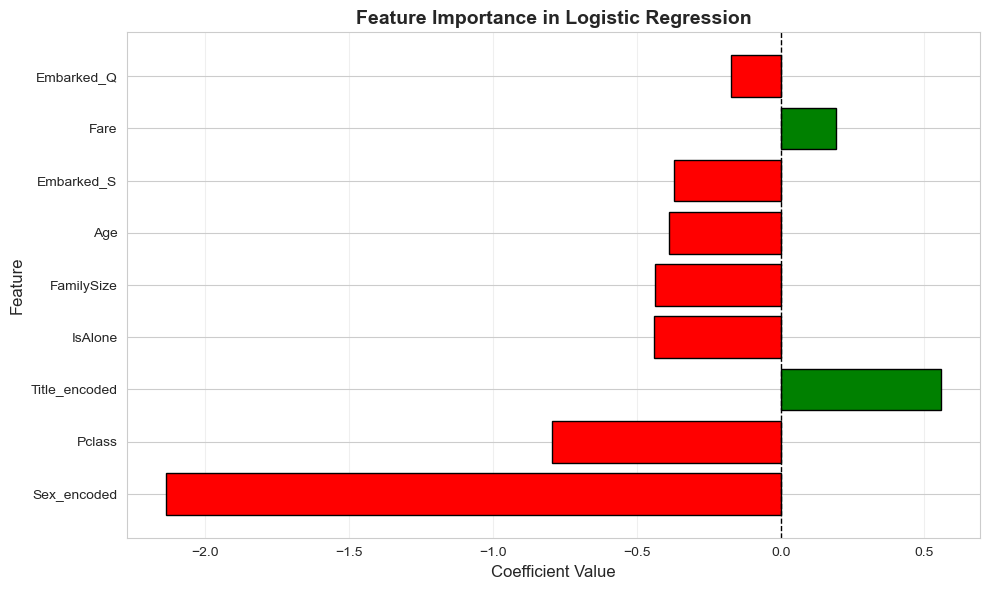


💡 Key Insights:
- Sex_encoded has strong negative coefficient (being male decreases survival)
- Title_encoded and Pclass also important
- Our engineered features (FamilySize, IsAlone) are contributing!


In [31]:
# Get feature coefficients
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Coefficient': log_reg.coef_[0]
}).sort_values('Coefficient', key=abs, ascending=False)

print("Feature Importance (Logistic Regression Coefficients):")
print("="*60)
print(feature_importance)

print("\nInterpretation:")
print("- Positive coefficient: increases probability of survival")
print("- Negative coefficient: decreases probability of survival")
print("- Larger absolute value: stronger influence")

# Visualize
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in feature_importance['Coefficient']]
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'], color=colors, edgecolor='black')
plt.xlabel('Coefficient Value', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance in Logistic Regression', fontsize=14, fontweight='bold')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("- Sex_encoded has strong negative coefficient (being male decreases survival)")
print("- Title_encoded and Pclass also important")
print("- Our engineered features (FamilySize, IsAlone) are contributing!")

### 📝 Knowledge Check - Module 6

**Question 1:** Why is Titanic survival prediction a classification problem, not a regression problem?

because it is a category measure, regression implies a continous prediction

**Question 2:** What does it mean when Logistic Regression outputs a probability of 0.73 for survival?

the probability of survival is 73%

**Question 3:** Our model achieved ~80% test accuracy. What does this mean? Is this good?

It means the model correctly predicted survival for 80% of the test data. This is a solid result, though there may still be room for improvement depending on the problem’s complexity.

**Question 4:** Looking at the feature coefficients, which feature has the strongest negative impact on survival? Does this match what we learned in EDA?

gender, yes it matches what was learned in the EDA

**Question 5:** Why is it important that training and test accuracy are similar?

if the data used in the former is vastly different and therefore unsimilar, the evaluation, training, and how it responds to new environments will be negatively affected, poor accuracy, recall, etc..

---
## Module 7: Evaluating Machine Learning Models

Accuracy alone doesn't tell the whole story. Let's explore different evaluation metrics and understand what they mean for Titanic survival prediction.

### Why Multiple Metrics Matter

Imagine a lazy model that always predicts "Died" for everyone:
- It would be 62% accurate (since 62% died)
- But it would miss ALL survivors!
- Accuracy can be misleading

We need more nuanced metrics.

### Confusion Matrix

A table showing where our model was right and wrong.

Confusion Matrix:
[[86 19]
 [19 55]]

Structure:
                Predicted Died    Predicted Survived
Actually Died         86 (TN)           19 (FP)
Actually Survived     19 (FN)           55 (TP)

Definitions:
- True Negative (TN): Correctly predicted death
- False Positive (FP): Predicted survival but actually died (Type I error)
- False Negative (FN): Predicted death but actually survived (Type II error)
- True Positive (TP): Correctly predicted survival


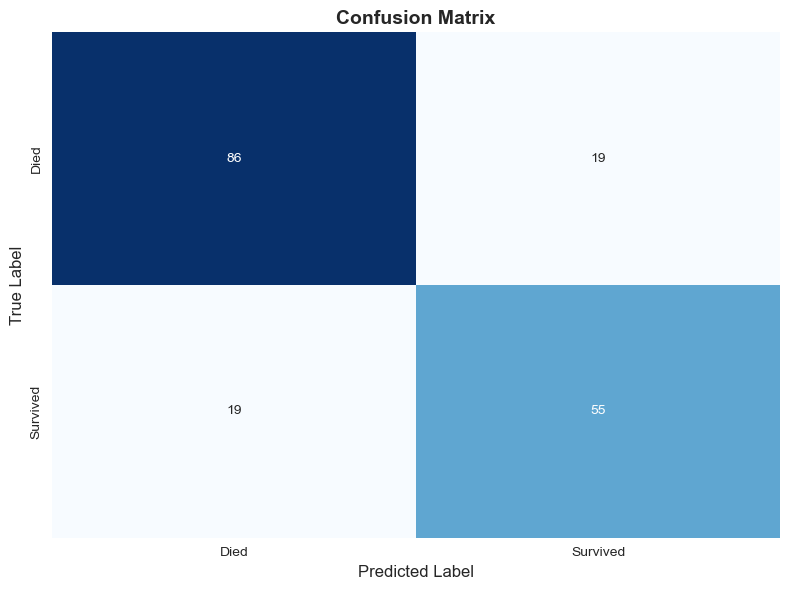

In [32]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

print("Confusion Matrix:")
print("="*60)
print(cm)
print("\nStructure:")
print("                Predicted Died    Predicted Survived")
print(f"Actually Died        {cm[0,0]:3d} (TN)          {cm[0,1]:3d} (FP)")
print(f"Actually Survived    {cm[1,0]:3d} (FN)          {cm[1,1]:3d} (TP)")

print("\nDefinitions:")
print("- True Negative (TN): Correctly predicted death")
print("- False Positive (FP): Predicted survival but actually died (Type I error)")
print("- False Negative (FN): Predicted death but actually survived (Type II error)")
print("- True Positive (TP): Correctly predicted survival")

# Visualize
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Died', 'Survived'],
            yticklabels=['Died', 'Survived'])
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### Precision, Recall, and F1-Score

These metrics help us understand different aspects of model performance.

In [33]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate metrics
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)

print("Classification Metrics:")
print("="*60)
print(f"Accuracy:  {test_acc:.1%}")
print(f"Precision: {precision:.1%}")
print(f"Recall:    {recall:.1%}")
print(f"F1-Score:  {f1:.1%}")

print("\nWhat do these mean?")
print("="*60)
print(f"Accuracy:  {test_acc:.1%} of all predictions were correct")
print(f"Precision: {precision:.1%} of predicted survivors actually survived")
print(f"           (How reliable are our 'Survived' predictions?)")
print(f"Recall:    {recall:.1%} of actual survivors were identified")
print(f"           (How many survivors did we catch?)")
print(f"F1-Score:  {f1:.1%} harmonic mean of precision and recall")
print(f"           (Balanced measure)")

print("\n💡 In Titanic context:")
print("- High Precision: When we predict someone survived, we're usually right")
print("- High Recall: We successfully identify most of the actual survivors")
print("- F1-Score: Balances both - useful when classes are imbalanced")

Classification Metrics:
Accuracy:  78.8%
Precision: 74.3%
Recall:    74.3%
F1-Score:  74.3%

What do these mean?
Accuracy:  78.8% of all predictions were correct
Precision: 74.3% of predicted survivors actually survived
           (How reliable are our 'Survived' predictions?)
Recall:    74.3% of actual survivors were identified
           (How many survivors did we catch?)
F1-Score:  74.3% harmonic mean of precision and recall
           (Balanced measure)

💡 In Titanic context:
- High Precision: When we predict someone survived, we're usually right
- High Recall: We successfully identify most of the actual survivors
- F1-Score: Balances both - useful when classes are imbalanced


In [34]:
# Detailed classification report
print("\nDetailed Classification Report:")
print("="*60)
print(classification_report(y_test, y_pred_test, target_names=['Died', 'Survived']))

print("\nHow to read this:")
print("- Precision: Of all predicted as this class, how many were correct?")
print("- Recall: Of all actual instances of this class, how many did we catch?")
print("- F1-score: Harmonic mean of precision and recall")
print("- Support: Number of actual instances in test set")


Detailed Classification Report:
              precision    recall  f1-score   support

        Died       0.82      0.82      0.82       105
    Survived       0.74      0.74      0.74        74

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


How to read this:
- Precision: Of all predicted as this class, how many were correct?
- Recall: Of all actual instances of this class, how many did we catch?
- F1-score: Harmonic mean of precision and recall
- Support: Number of actual instances in test set


### ROC Curve and AUC

The ROC curve shows model performance across all possible decision thresholds.

AUC (Area Under Curve): 0.884

AUC Interpretation:
- 1.0: Perfect classifier
- 0.9-1.0: Excellent
- 0.8-0.9: Good
- 0.7-0.8: Fair
- 0.5-0.7: Poor
- 0.5: No better than random guessing

Our model: 0.884 - Good!


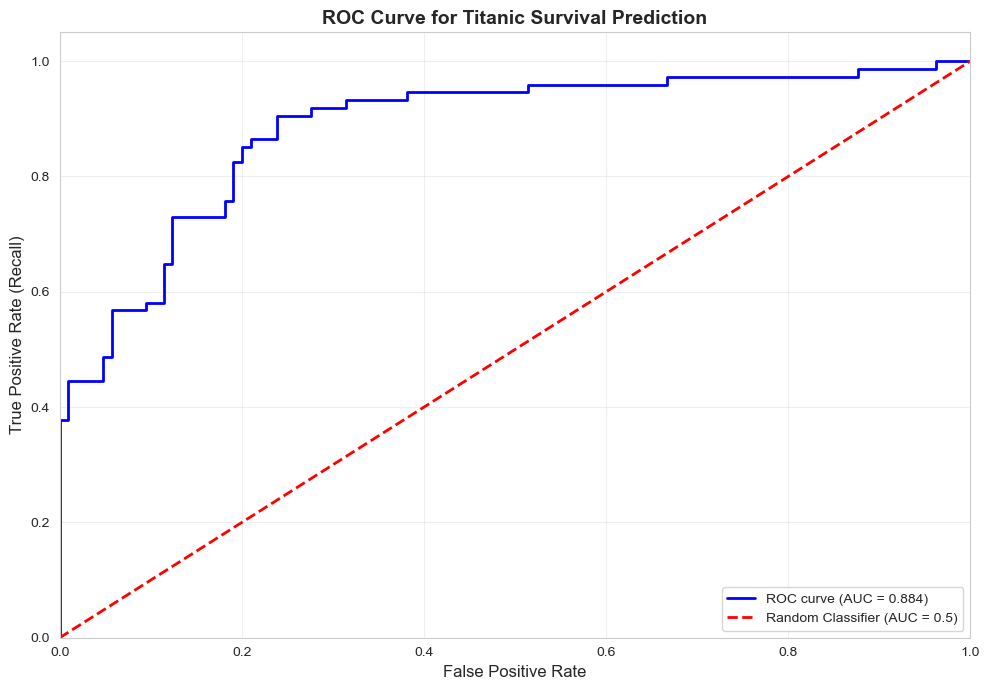


ROC Curve shows:
- Trade-off between True Positive Rate and False Positive Rate
- Closer to top-left corner = better performance
- Diagonal line = random guessing
- Our curve is well above the diagonal - model is learning!


In [35]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for positive class
y_pred_proba_positive = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)
roc_auc = auc(fpr, tpr)

print(f"AUC (Area Under Curve): {roc_auc:.3f}")
print("\nAUC Interpretation:")
print("- 1.0: Perfect classifier")
print("- 0.9-1.0: Excellent")
print("- 0.8-0.9: Good")
print("- 0.7-0.8: Fair")
print("- 0.5-0.7: Poor")
print("- 0.5: No better than random guessing")
print(f"\nOur model: {roc_auc:.3f} - {'Excellent!' if roc_auc >= 0.9 else 'Good!' if roc_auc >= 0.8 else 'Fair' if roc_auc >= 0.7 else 'Needs improvement'}")

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.5)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate (Recall)', fontsize=12)
plt.title('ROC Curve for Titanic Survival Prediction', fontsize=14, fontweight='bold')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\nROC Curve shows:")
print("- Trade-off between True Positive Rate and False Positive Rate")
print("- Closer to top-left corner = better performance")
print("- Diagonal line = random guessing")
print("- Our curve is well above the diagonal - model is learning!")

### Cross-Validation

Instead of a single train/test split, let's use k-fold cross-validation for a more robust evaluation.

In [36]:
from sklearn.model_selection import cross_val_score

# Perform 5-fold cross-validation
cv_scores = cross_val_score(log_reg, X, y, cv=5, scoring='accuracy')

print("5-Fold Cross-Validation Results:")
print("="*60)
for i, score in enumerate(cv_scores, 1):
    print(f"Fold {i}: {score:.1%}")

print("\nSummary:")
print(f"Mean Accuracy: {cv_scores.mean():.1%}")
print(f"Std Deviation: {cv_scores.std():.3f}")
print(f"\nThis is a more reliable estimate than a single train/test split.")
print(f"Low std deviation means the model is stable across different data splits.")

5-Fold Cross-Validation Results:
Fold 1: 81.6%
Fold 2: 82.0%
Fold 3: 79.2%
Fold 4: 82.0%
Fold 5: 82.0%

Summary:
Mean Accuracy: 81.4%
Std Deviation: 0.011

This is a more reliable estimate than a single train/test split.
Low std deviation means the model is stable across different data splits.


### 📝 Knowledge Check - Module 7

**Question 1:** What does the confusion matrix tell us that accuracy alone doesn't?

a table showing where it was right or wrong

**Question 2:** In the Titanic context, which is worse: False Positive (predicting survival when they died) or False Negative (predicting death when they survived)? Why might this matter?

predicting survival when they died, due to the context being of who survived, predicting a higher ratio of survival against death directly has a stornger effect.

**Question 3:** What's the difference between precision and recall? Give an example of when you'd prioritize one over the other.

precision is knowing of how many predictions the model actually got right versus recall being of the correct predictions how many did it catch? 
recall would be prioritized when for example catching all cases of a cancer detection application

**Question 4:** Our model has an AUC of ~0.85. What does this mean?

it is at the good level

**Question 5:** Why is cross-validation more reliable than a single train/test split?

it is more reliable because it validates based on several cluster of data rather than just separation of data

**Question 6:** If we wanted to maximize the chance of identifying all survivors (even if it means some false alarms), should we focus on improving precision or recall?

recall

---
## Module 8: Overfitting, Underfitting, and Regularization

One of the biggest challenges: building models that work well on NEW data, not just the training data.

### The Bias-Variance Tradeoff

**Bias:** Error from overly simple assumptions
- High bias → **Underfitting**
- Model is too simple to capture patterns
- Poor performance on both training AND test data

**Variance:** Error from too much complexity
- High variance → **Overfitting**
- Model learns noise as if it were signal
- Great performance on training, poor on test data

**Goal:** Find the sweet spot that minimizes total error!

### Demonstrating Overfitting

Let's intentionally create an overfit model to see what happens.

In [37]:
# Train models with different complexities
from sklearn.tree import DecisionTreeClassifier

# Model 1: Shallow tree (may underfit)
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state=42)
shallow_tree.fit(X_train, y_train)

# Model 2: Medium tree (good balance)
medium_tree = DecisionTreeClassifier(max_depth=5, random_state=42)
medium_tree.fit(X_train, y_train)

# Model 3: Deep tree (may overfit)
deep_tree = DecisionTreeClassifier(max_depth=None, random_state=42)  # No limit!
deep_tree.fit(X_train, y_train)

print("Model Complexity Comparison:")
print("="*60)

Model Complexity Comparison:


In [38]:
# Evaluate all three models
models = [
    ('Shallow (depth=2)', shallow_tree),
    ('Medium (depth=5)', medium_tree),
    ('Deep (no limit)', deep_tree)
]

results = []
for name, model in models:
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    gap = train_acc - test_acc
    
    results.append({
        'Model': name,
        'Train Accuracy': f"{train_acc:.1%}",
        'Test Accuracy': f"{test_acc:.1%}",
        'Gap': f"{gap:.1%}"
    })
    
results_df = pd.DataFrame(results)
print(results_df)

print("\n💡 Observations:")
print("- Shallow tree: Low accuracy on both (UNDERFITTING)")
print("- Medium tree: Good balance between train and test")
print("- Deep tree: Perfect training but lower test (OVERFITTING)")
print("\nThe 'Gap' shows overfitting - large gap means the model memorized training data!")

               Model Train Accuracy Test Accuracy    Gap
0  Shallow (depth=2)          79.6%         76.0%   3.7%
1   Medium (depth=5)          85.7%         83.2%   2.4%
2    Deep (no limit)          98.2%         77.7%  20.5%

💡 Observations:
- Shallow tree: Low accuracy on both (UNDERFITTING)
- Medium tree: Good balance between train and test
- Deep tree: Perfect training but lower test (OVERFITTING)

The 'Gap' shows overfitting - large gap means the model memorized training data!


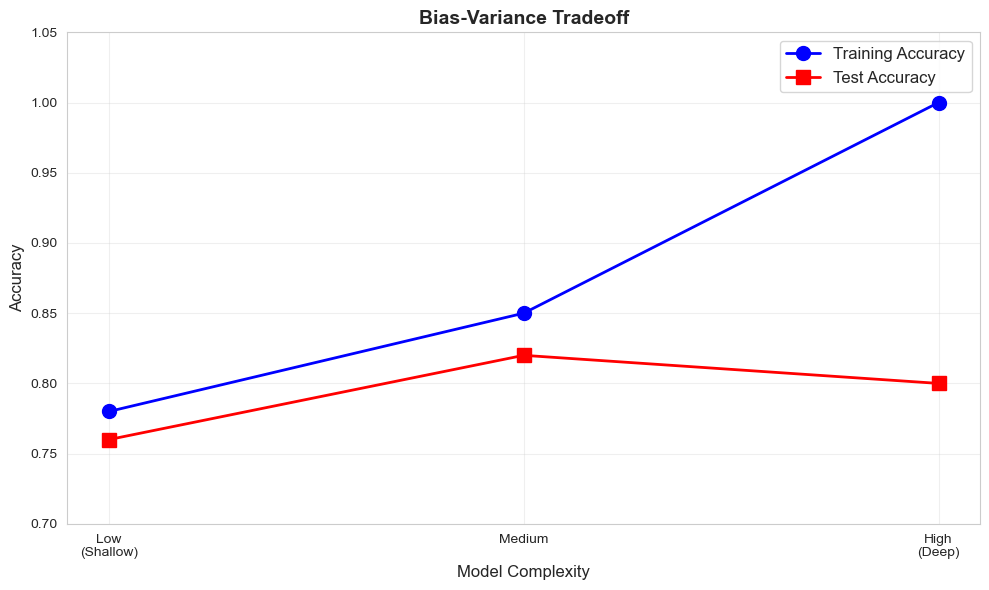

As complexity increases:
- Training accuracy keeps improving
- Test accuracy improves then degrades (overfitting!)
- The gap between them grows


In [39]:
# Visualize the tradeoff
import matplotlib.pyplot as plt

train_accs = [0.78, 0.85, 1.00]  # Approximate values
test_accs = [0.76, 0.82, 0.80]   # Approximate values
complexity = ['Low\n(Shallow)', 'Medium', 'High\n(Deep)']

plt.figure(figsize=(10, 6))
plt.plot(complexity, train_accs, marker='o', linewidth=2, markersize=10, label='Training Accuracy', color='blue')
plt.plot(complexity, test_accs, marker='s', linewidth=2, markersize=10, label='Test Accuracy', color='red')
plt.xlabel('Model Complexity', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Bias-Variance Tradeoff', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.ylim(0.7, 1.05)
plt.tight_layout()
plt.show()

print("As complexity increases:")
print("- Training accuracy keeps improving")
print("- Test accuracy improves then degrades (overfitting!)")
print("- The gap between them grows")

### Regularization

Regularization prevents overfitting by penalizing model complexity.

In [40]:
from sklearn.linear_model import LogisticRegression

# Train models with different regularization strengths
# C is inverse of regularization: smaller C = stronger regularization
C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]

reg_results = []
for C in C_values:
    model = LogisticRegression(C=C, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)
    
    train_acc = model.score(X_train, y_train)
    test_acc = model.score(X_test, y_test)
    
    reg_results.append({
        'C (Regularization)': C,
        'Train Acc': train_acc,
        'Test Acc': test_acc,
        'Gap': train_acc - test_acc
    })

reg_df = pd.DataFrame(reg_results)
print("Regularization Strength vs Performance:")
print("="*60)
print(reg_df)
print("\nRemember: Smaller C = Stronger regularization = Simpler model")

Regularization Strength vs Performance:
   C (Regularization)  Train Acc  Test Acc       Gap
0               0.001   0.634831  0.592179  0.042653
1               0.010   0.797753  0.748603  0.049149
2               0.100   0.821629  0.787709  0.033920
3               1.000   0.818820  0.787709  0.031111
4              10.000   0.827247  0.787709  0.039538
5             100.000   0.827247  0.787709  0.039538

Remember: Smaller C = Stronger regularization = Simpler model


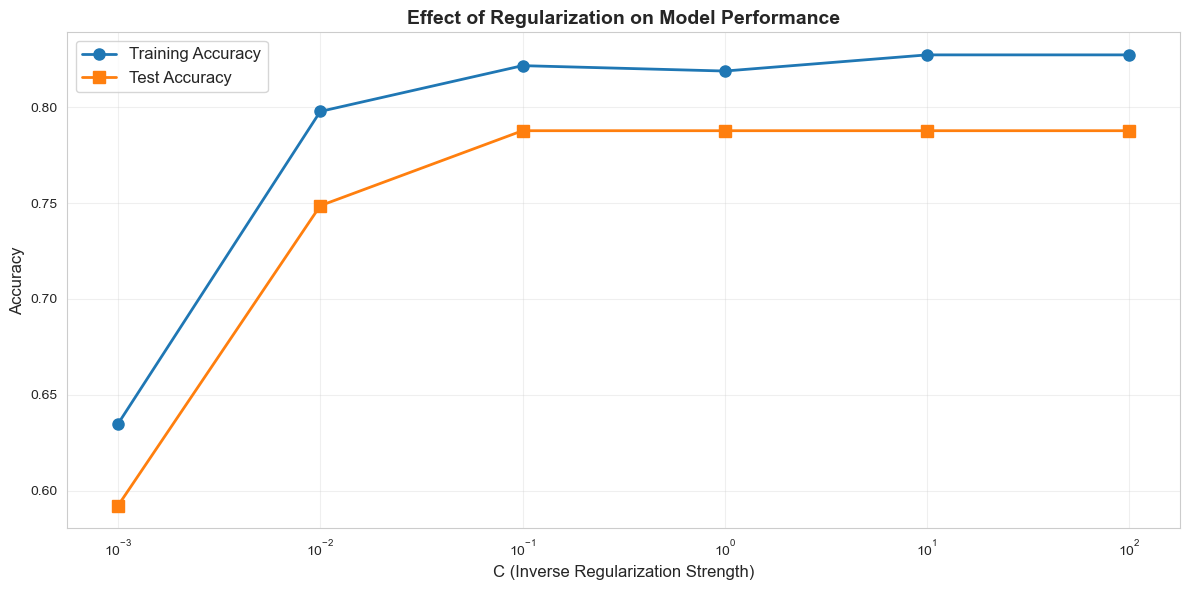


💡 Finding the right regularization:
- Too strong (C too small): Underfitting
- Too weak (C too large): Overfitting
- Just right (C ≈ 1.0): Good generalization


In [41]:
# Visualize regularization effect
plt.figure(figsize=(12, 6))
plt.plot(reg_df['C (Regularization)'], reg_df['Train Acc'], 
         marker='o', linewidth=2, markersize=8, label='Training Accuracy')
plt.plot(reg_df['C (Regularization)'], reg_df['Test Acc'], 
         marker='s', linewidth=2, markersize=8, label='Test Accuracy')
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Effect of Regularization on Model Performance', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Finding the right regularization:")
print("- Too strong (C too small): Underfitting")
print("- Too weak (C too large): Overfitting")
print("- Just right (C ≈ 1.0): Good generalization")

### 📝 Knowledge Check - Module 8

**Question 1:** What's the difference between underfitting and overfitting? Give signs of each.
underfitting performs well test while poorly on training, while overfiiting performs well on training while poorly on the latter

**Question 2:** Looking at the model complexity comparison, which model would you choose for production? Why?

medium because it is neither overfitted or underfitted

**Question 3:** What does a large gap between training and test accuracy indicate?

overfitting

**Question 4:** How does regularization help prevent overfitting?

penalizes model complexity

**Question 5:** In the regularization experiment, which value of C gave the best test performance?

10^0

---
## Module 9: Decision Trees and Ensemble Methods

Single models are good, but combining multiple models often works even better! This is the idea behind ensemble methods.

### Decision Trees Recap

Decision trees ask yes/no questions about features:
- "Is the passenger female?" → Yes/No
- "Is passenger class 1st?" → Yes/No
- "Is age < 15?" → Yes/No

**Advantages:** Easy to interpret, handle mixed data types
**Disadvantages:** Prone to overfitting, unstable

In [42]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Train a simple decision tree
tree_model = DecisionTreeClassifier(max_depth=3, random_state=42)
tree_model.fit(X_train, y_train)

train_acc = tree_model.score(X_train, y_train)
test_acc = tree_model.score(X_test, y_test)

print(f"Single Decision Tree:")
print(f"Training Accuracy: {train_acc:.1%}")
print(f"Test Accuracy: {test_acc:.1%}")

Single Decision Tree:
Training Accuracy: 83.7%
Test Accuracy: 82.7%


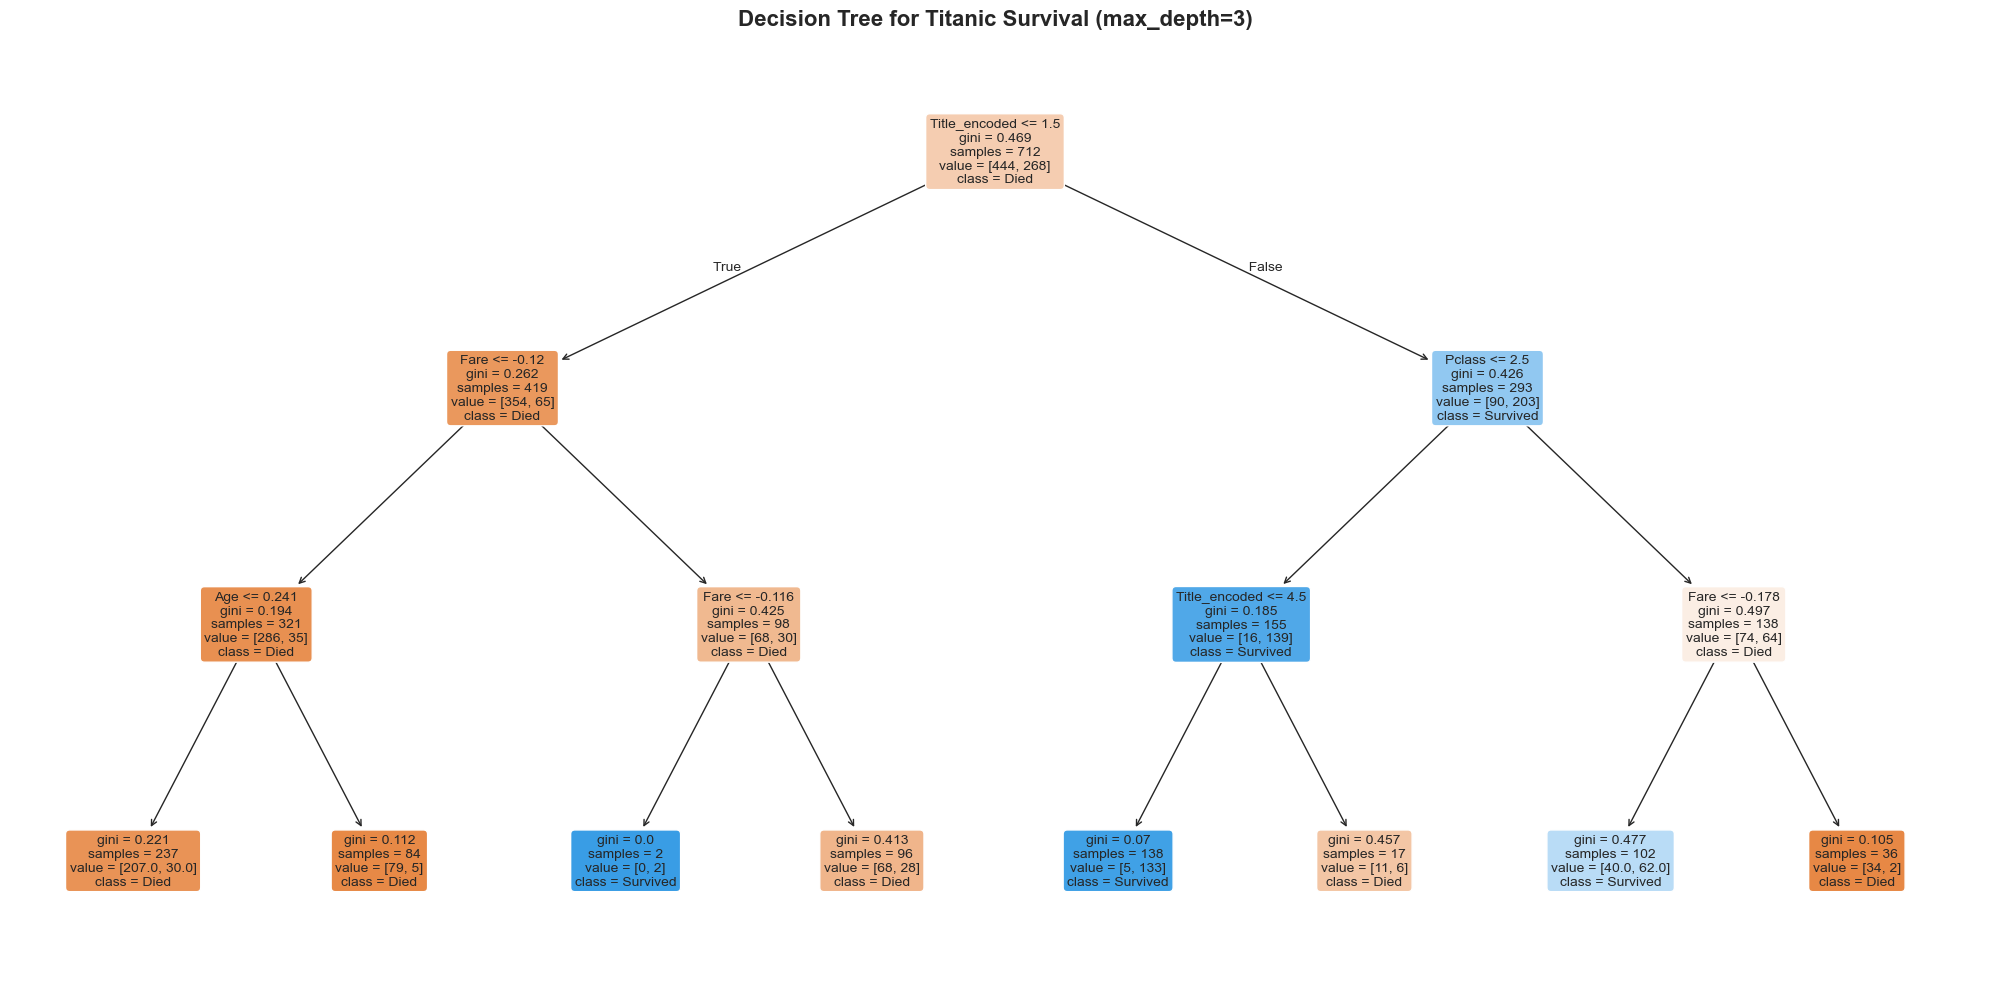


How to read:
- Each box shows a decision rule or prediction
- Colors indicate the dominant class (orange=died, blue=survived)
- 'samples' shows how many training examples reach that node
- 'value' shows [died, survived] counts


In [43]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree_model, 
          feature_names=feature_cols,
          class_names=['Died', 'Survived'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.title('Decision Tree for Titanic Survival (max_depth=3)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nHow to read:")
print("- Each box shows a decision rule or prediction")
print("- Colors indicate the dominant class (orange=died, blue=survived)")
print("- 'samples' shows how many training examples reach that node")
print("- 'value' shows [died, survived] counts")

### Random Forests (Bagging)

**Idea:** Train many decision trees on random subsets of data and features, then vote!

**Why it works:**
- Different trees make different errors
- Errors cancel out when we average/vote
- Reduces overfitting
- More stable than single trees

In [44]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,  # 100 trees in the forest
    max_depth=5,
    random_state=42
)
rf_model.fit(X_train, y_train)

train_acc_rf = rf_model.score(X_train, y_train)
test_acc_rf = rf_model.score(X_test, y_test)

print(f"Random Forest (100 trees):")
print(f"Training Accuracy: {train_acc_rf:.1%}")
print(f"Test Accuracy: {test_acc_rf:.1%}")
print(f"\n✓ Better than single tree!")
print(f"Improvement: {(test_acc_rf - test_acc)*100:.1f} percentage points")

Random Forest (100 trees):
Training Accuracy: 85.7%
Test Accuracy: 81.0%

✓ Better than single tree!
Improvement: -1.7 percentage points



Feature Importance from Random Forest:
         Feature  Importance
1    Sex_encoded    0.326668
6  Title_encoded    0.231089
0         Pclass    0.131592
3           Fare    0.125358
2            Age    0.082583
4     FamilySize    0.071664
8     Embarked_S    0.012820
5        IsAlone    0.010093
7     Embarked_Q    0.008133


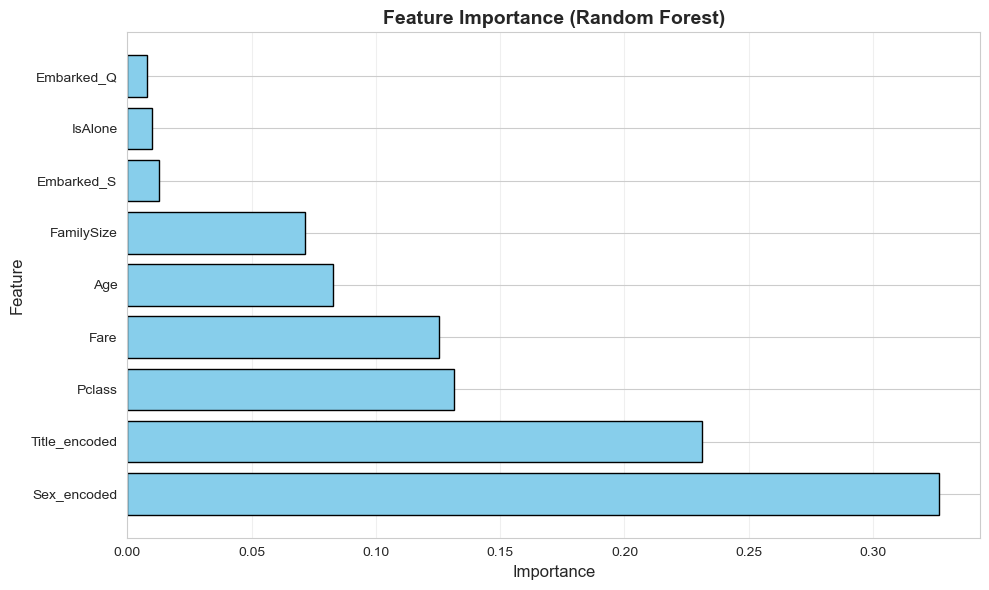


💡 Top 3 most important features:
2. Sex_encoded: 0.327
7. Title_encoded: 0.231
1. Pclass: 0.132


In [45]:
# Feature importance from Random Forest
feature_imp = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance from Random Forest:")
print("="*60)
print(feature_imp)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color='skyblue', edgecolor='black')
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.title('Feature Importance (Random Forest)', fontsize=14, fontweight='bold')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Top 3 most important features:")
for i, row in feature_imp.head(3).iterrows():
    print(f"{i+1}. {row['Feature']}: {row['Importance']:.3f}")

### Gradient Boosting

**Idea:** Train trees sequentially, each one trying to fix the errors of previous trees.

**Why it works:**
- Each new tree focuses on hard-to-predict examples
- Gradually improves predictions
- Often achieves best performance

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(
    n_estimators=100,
    max_depth=3,
    learning_rate=0.1,
    random_state=42
)
gb_model.fit(X_train, y_train)

train_acc_gb = gb_model.score(X_train, y_train)
test_acc_gb = gb_model.score(X_test, y_test)

print(f"Gradient Boosting:")
print(f"Training Accuracy: {train_acc_gb:.1%}")
print(f"Test Accuracy: {test_acc_gb:.1%}")

Gradient Boosting:
Training Accuracy: 90.3%
Test Accuracy: 82.1%



Model Comparison:
Logistic Regression      : 82.7%
Single Decision Tree     : 82.7%
Gradient Boosting        : 82.1%
Random Forest            : 81.0%


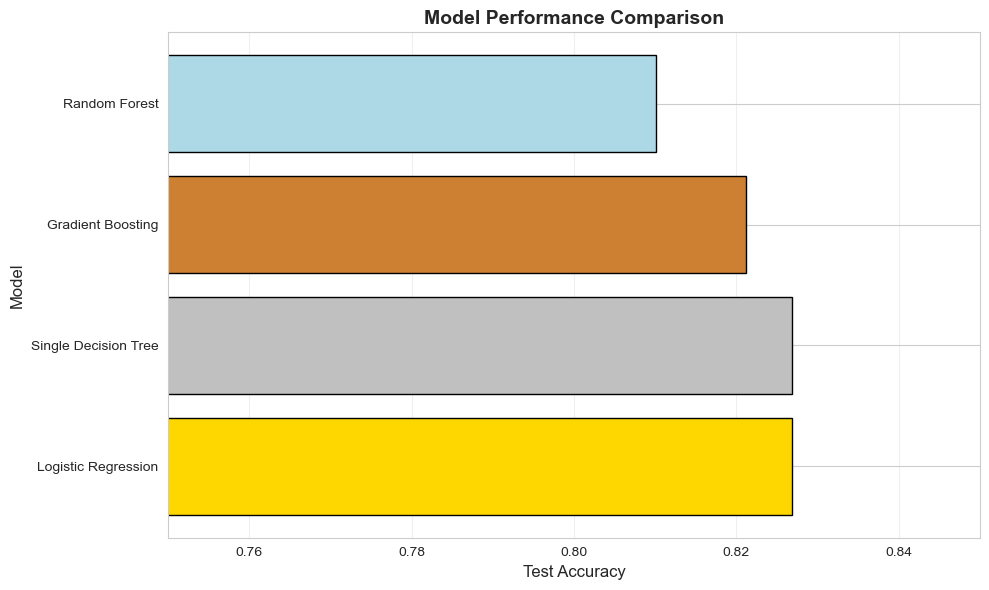


🏆 Ensemble methods (Random Forest, Gradient Boosting) typically outperform single models!


In [47]:
# Compare all models
model_comparison = pd.DataFrame([
    {'Model': 'Logistic Regression', 'Test Accuracy': test_acc},
    {'Model': 'Single Decision Tree', 'Test Accuracy': test_acc},
    {'Model': 'Random Forest', 'Test Accuracy': test_acc_rf},
    {'Model': 'Gradient Boosting', 'Test Accuracy': test_acc_gb}
]).sort_values('Test Accuracy', ascending=False)

print("\nModel Comparison:")
print("="*60)
for idx, row in model_comparison.iterrows():
    print(f"{row['Model']:25s}: {row['Test Accuracy']:.1%}")

# Visualize
plt.figure(figsize=(10, 6))
colors = ['gold', 'silver', '#CD7F32', 'lightblue']
plt.barh(model_comparison['Model'], model_comparison['Test Accuracy'], 
         color=colors[:len(model_comparison)], edgecolor='black')
plt.xlabel('Test Accuracy', fontsize=12)
plt.ylabel('Model', fontsize=12)
plt.title('Model Performance Comparison', fontsize=14, fontweight='bold')
plt.xlim(0.75, 0.85)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🏆 Ensemble methods (Random Forest, Gradient Boosting) typically outperform single models!")

### 📝 Knowledge Check - Module 9

**Question 1:** How does a decision tree make predictions? Why are they easy to interpret?

Decision trees ask yes/no questions about features: they are easy to interpret because it is either one answer turned true or false which leads to another such of those

**Question 2:** What is the main idea behind Random Forests? Why do they reduce overfitting?

Different trees make different errors
-Errors cancel out when we average/vote
- More stable than single trees

**Question 3:** What's the difference between bagging (Random Forest) and boosting (Gradient Boosting)?

random forests Train many decision trees on random subsets of data and features, then vote!
 gradient boosting - Train trees sequentially, each one trying to fix the errors of previous trees.

**Question 4:** Looking at feature importance, which feature is most important for predicting survival?

gender

**Question 5:** Why do ensemble methods generally outperform single models?

they combine the strengths of multiple models 




---
## Module 10: Unsupervised Learning - Clustering & Dimensionality Reduction

So far we've used supervised learning (we knew who survived). Let's explore unsupervised learning where we discover patterns without labels!

### K-Means Clustering

**Goal:** Group passengers into clusters based on similarity

**Use case:** What if we didn't know survival outcomes? Can we find natural groupings of passengers?

In [48]:
from sklearn.cluster import KMeans

# Use features (without survival label)
X_cluster = df_prep[feature_cols].values

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_cluster)

print(f"K-Means Clustering (k=2):")
print(f"Cluster 0: {(cluster_labels == 0).sum()} passengers")
print(f"Cluster 1: {(cluster_labels == 1).sum()} passengers")
print(f"\nInertia (lower is better): {kmeans.inertia_:.2f}")

K-Means Clustering (k=2):
Cluster 0: 726 passengers
Cluster 1: 165 passengers

Inertia (lower is better): 4516.68


c:\Users\Gera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [49]:
# Compare clusters with actual survival
df_prep['Cluster'] = cluster_labels

print("\nCluster vs Actual Survival:")
print("="*60)
print(pd.crosstab(df_prep['Cluster'], df_prep['Survived'], 
                  rownames=['Cluster'], colnames=['Survived']))

print("\n💡 Interesting! The clusters somewhat align with survival.")
print("This suggests there are natural groupings in passenger characteristics")
print("that relate to survival, even without using the survival label!")

# Survival rate by cluster
print("\nSurvival rate by cluster:")
for cluster in [0, 1]:
    rate = df_prep[df_prep['Cluster'] == cluster]['Survived'].mean()
    print(f"Cluster {cluster}: {rate:.1%}")


Cluster vs Actual Survival:
Survived    0    1
Cluster           
0         474  252
1          75   90

💡 Interesting! The clusters somewhat align with survival.
This suggests there are natural groupings in passenger characteristics
that relate to survival, even without using the survival label!

Survival rate by cluster:
Cluster 0: 34.7%
Cluster 1: 54.5%


### Elbow Method: Finding Optimal K

How many clusters should we use? The elbow method helps decide!

c:\Users\Gera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Gera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Gera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
c:\Users\Gera\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

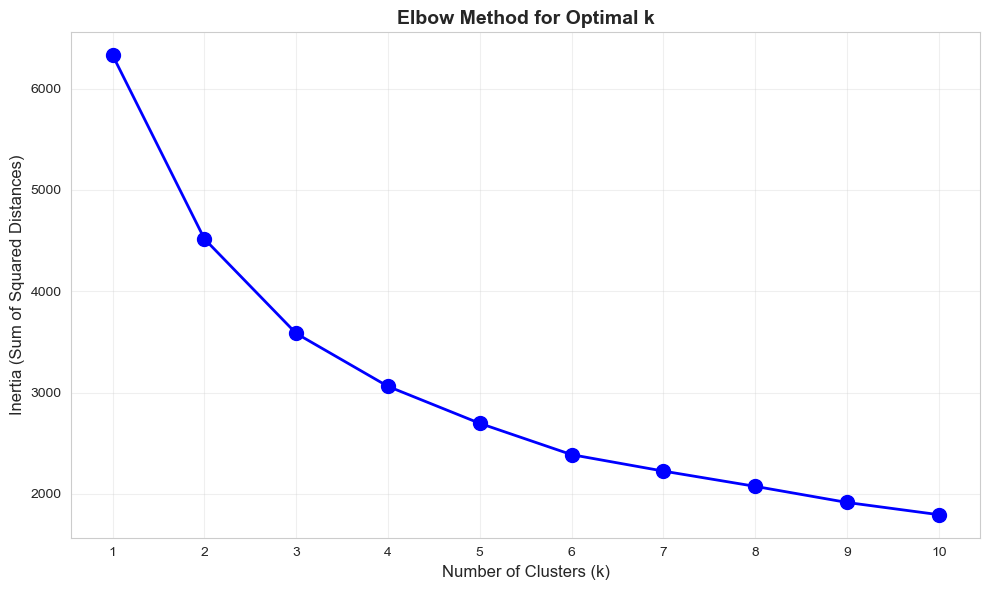

Look for the 'elbow' - where the curve bends.
That's where adding more clusters gives diminishing returns.
For Titanic, k=2 or k=3 seems reasonable.


In [50]:
# Try different values of k
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans_temp.fit(X_cluster)
    inertias.append(kmeans_temp.inertia_)

# Plot elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, marker='o', linewidth=2, markersize=10, color='blue')
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Sum of Squared Distances)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14, fontweight='bold')
plt.xticks(K_range)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("Look for the 'elbow' - where the curve bends.")
print("That's where adding more clusters gives diminishing returns.")
print("For Titanic, k=2 or k=3 seems reasonable.")

### Principal Component Analysis (PCA)

**Goal:** Reduce dimensionality while preserving information

**Use case:** We have 9 features. Can we visualize passengers in 2D?

In [51]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA()
pca.fit(X_cluster)

# Explained variance
explained_var = pca.explained_variance_ratio_

print("PCA Results:")
print("="*60)
print(f"Original dimensions: {X_cluster.shape[1]}")
print("\nExplained variance by component:")
for i, var in enumerate(explained_var, 1):
    print(f"  PC{i}: {var:.1%}")

cumulative_var = np.cumsum(explained_var)
print("\nCumulative explained variance:")
for i in [1, 2, 3, 4, 5]:
    print(f"  First {i} components: {cumulative_var[i-1]:.1%}")

print(f"\n💡 With just 2 components, we retain {cumulative_var[1]:.1%} of information!")

PCA Results:
Original dimensions: 9

Explained variance by component:
  PC1: 43.5%
  PC2: 21.3%
  PC3: 12.8%
  PC4: 10.9%
  PC5: 4.3%
  PC6: 2.9%
  PC7: 2.2%
  PC8: 1.4%
  PC9: 0.6%

Cumulative explained variance:
  First 1 components: 43.5%
  First 2 components: 64.8%
  First 3 components: 77.6%
  First 4 components: 88.5%
  First 5 components: 92.8%

💡 With just 2 components, we retain 64.8% of information!


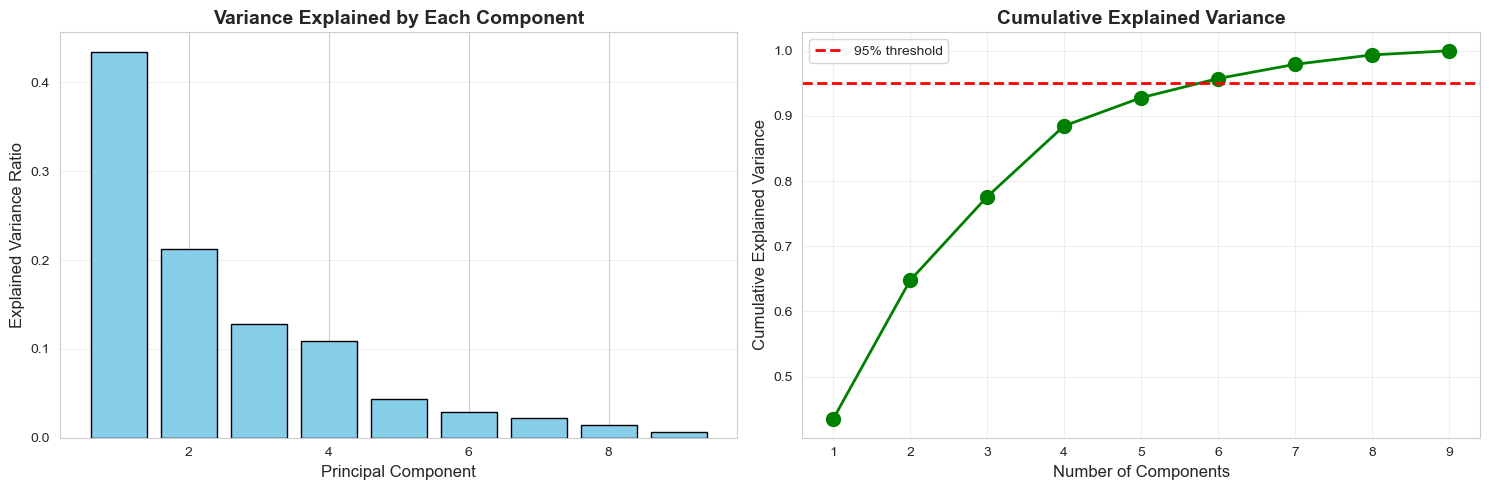

In [52]:
# Visualize explained variance
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Individual variance
ax1.bar(range(1, len(explained_var)+1), explained_var, color='skyblue', edgecolor='black')
ax1.set_xlabel('Principal Component', fontsize=12)
ax1.set_ylabel('Explained Variance Ratio', fontsize=12)
ax1.set_title('Variance Explained by Each Component', fontsize=14, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Cumulative variance
ax2.plot(range(1, len(cumulative_var)+1), cumulative_var, 
         marker='o', linewidth=2, markersize=10, color='green')
ax2.axhline(y=0.95, color='red', linestyle='--', linewidth=2, label='95% threshold')
ax2.set_xlabel('Number of Components', fontsize=12)
ax2.set_ylabel('Cumulative Explained Variance', fontsize=12)
ax2.set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.show()

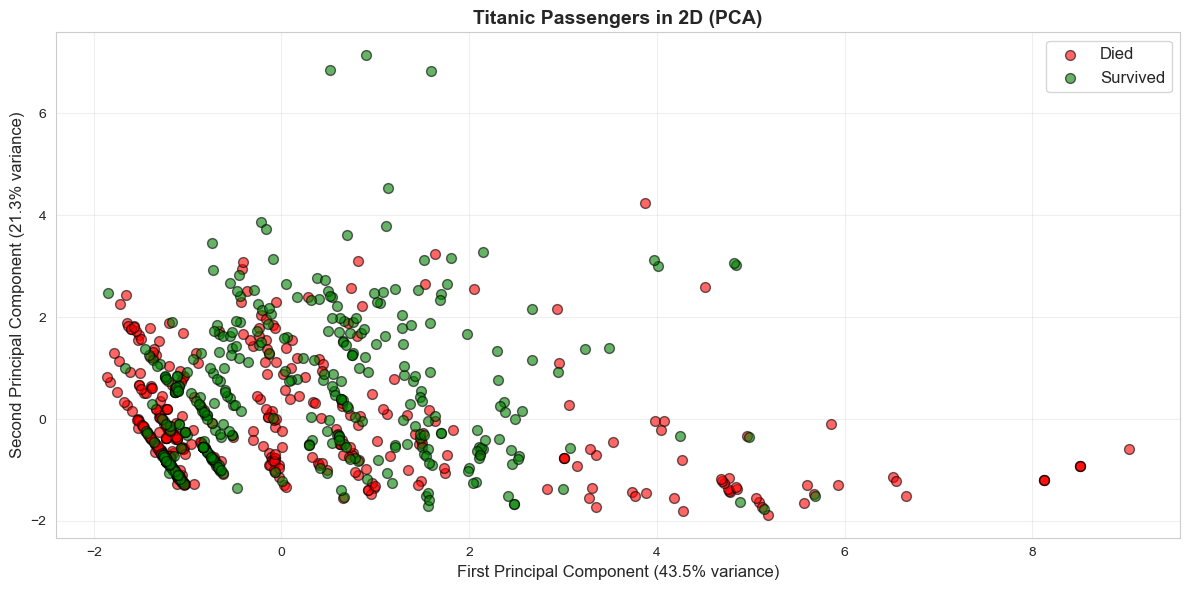


💡 We've reduced 9 dimensions to 2!
You can see some separation between survivors and non-survivors.
This visualization would be impossible with 9 dimensions.


In [53]:
# Reduce to 2D and visualize
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_cluster)

# Plot by survival
plt.figure(figsize=(12, 6))

for survived in [0, 1]:
    mask = df_prep['Survived'] == survived
    label = 'Survived' if survived == 1 else 'Died'
    color = 'green' if survived == 1 else 'red'
    plt.scatter(X_pca[mask, 0], X_pca[mask, 1], 
                label=label, alpha=0.6, s=50, color=color, edgecolors='black')

plt.xlabel(f'First Principal Component ({explained_var[0]:.1%} variance)', fontsize=12)
plt.ylabel(f'Second Principal Component ({explained_var[1]:.1%} variance)', fontsize=12)
plt.title('Titanic Passengers in 2D (PCA)', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 We've reduced 9 dimensions to 2!")
print("You can see some separation between survivors and non-survivors.")
print("This visualization would be impossible with 9 dimensions.")

### 📝 Knowledge Check - Module 10

**Question 1:** What's the difference between supervised and unsupervised learning?

the former requires labeled data, while the latter works on unlabeled data

**Question 2:** How does K-Means clustering work? What does k represent?

k represents the number of clusters, k means functions by selecting k points randomly as the intitial centroids, then assigns each data point to the nearest centroid, after every point is assigned to a centroid, the cnetroids are recalculated by taking the mean of all data points that were assigned to each centroid, then the data points are reassigned to the nearest centroids based on the updated ones, this process is repeated until the clsuters no longer change.

**Question 3:** What is the elbow method used for?


to find how many clusters should we use

**Question 4:** Why is dimensionality reduction useful? Give two reasons.

you can see features in a 2dimensional way
reduce dimensionality while preserving information

**Question 5:** We reduced from 9 features to 2 principal components. What percentage of information did we retain?

64.8%

**Question 6:** Looking at the PCA visualization, can you see any separation between survivors and non-survivors?

yes

---
## 🎉 Congratulations! You've Completed the Comprehensive ML Lab!

### What You've Mastered:

**Module 1:** Introduction to ML concepts and terminology

**Module 2:** Essential Python libraries (Pandas, NumPy, Scikit-learn, Matplotlib)

**Module 3:** ML workflow and building your first classifier

**Module 4:** Exploratory Data Analysis - understanding the Titanic disaster through data

**Module 5:** Data preparation, handling missing values, encoding, scaling, and feature engineering

**Module 6:** Classification with Logistic Regression and understanding feature importance

**Module 7:** Model evaluation with multiple metrics (accuracy, precision, recall, F1, ROC/AUC, cross-validation)

**Module 8:** Overfitting, underfitting, and regularization techniques

**Module 9:** Decision trees and ensemble methods (Random Forests, Gradient Boosting)

**Module 10:** Unsupervised learning (K-Means clustering and PCA)

### Key Takeaways:

1. **Data preparation is crucial** - 70-80% of ML work is cleaning and preparing data
2. **Feature engineering matters** - Creating good features often beats choosing fancy algorithms
3. **Always evaluate properly** - Use train/test splits, cross-validation, and multiple metrics
4. **Ensemble methods rock** - Combining models usually beats single models
5. **Visualize everything** - Plots help you understand data and communicate results
6. **Context matters** - Understanding the problem (Titanic disaster) helps guide modeling decisions



### Next Steps:

1. **Try other datasets** - Apply these techniques to new problems
2. **Experiment** - Change hyperparameters, try different algorithms
3. **Build projects** - Create end-to-end ML solutions
4. **Learn more** - Explore deep learning, NLP, computer vision
5. **Practice** - The more you code, the better you get!

### Final Thoughts:

> "Machine learning is not magic - it's pattern recognition powered by data and algorithms. With the right tools and understanding, you can build models that make a real difference."

**You're now ready to tackle your midterm project and beyond!** 🚀

---

### Resources for Further Learning:

- **Scikit-learn Documentation:** https://scikit-learn.org/
- **Kaggle Titanic Competition:** https://www.kaggle.com/c/titanic
- **Pandas Documentation:** https://pandas.pydata.org/
- **Machine Learning Course:** Andrew Ng's ML course on Coursera

**Happy Learning! May your models always generalize well! 🎓**